In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np
import glob

# Functions

In [2]:
def read_results(path):
    with open(path, "r") as jsonfile:
        data = json.load(jsonfile)

    accuracy_array = data["task_accuracies"]
    max_len = 0
    for task_accuracy in accuracy_array:
        if len(task_accuracy) > max_len:
            max_len = len(task_accuracy)

    for task_accuracy in accuracy_array:
        for i in range(max_len - len(task_accuracy)):
            task_accuracy.append(0.0)

    accuracy_array = np.array(accuracy_array)
    accuracy_array[accuracy_array == 0.0] = np.nan

    for i, acc_array in enumerate(accuracy_array):
        for j in range(len(acc_array)):
            if i > 0 and np.isnan(acc_array[j]) and not np.isnan(accuracy_array[i - 1][j]):
                accuracy_array[i][j] = 0.0

    return accuracy_array

In [3]:
def cumulative_average_multiple_runs(pattern):
    cumulative_averages = []
    log_files = glob.glob(pattern)
    if len(log_files) == 0:
        print("No files found")
        return 0
    print(f"{len(log_files)} files found")
    for i, log in enumerate(log_files):
        print(f"{i + 1}: {log}")
        task_accuracies = read_results(log)
        cum_avg = [np.nansum(task_accuracies[i]) / (i + 1) for i in range(len(task_accuracies))]
        cumulative_averages.append(cum_avg)
    return np.mean(cumulative_averages, axis=0)

In [4]:
def plot_results(accuracy_array, title="Accuracy over Tasks"):
    plt.figure(figsize=(12, 6))
    for i in range(len(accuracy_array)):
        plt.plot(
            range(1, len(accuracy_array) + 1),
            accuracy_array[:, i],
            "-o",
            label=f"Avg. Acc. After T{i + 1}: {np.nansum(accuracy_array[i])/(i+1):.2f}%",
        )
        for j, value in enumerate(accuracy_array[:, i]):
            plt.annotate(
                f"{value:.2f}",
                (j + 1, value),
                textcoords="offset points",
                xytext=(12.5, 0),
                ha="center",
                fontsize=6
            )

    plt.xlabel("Task Trained On", fontsize=14)
    plt.ylabel("Accuracy (%)", fontsize=14)
    plt.grid(True, linewidth=0.3)
    plt.title(title, fontsize=14)
    plt.xticks(range(1, len(accuracy_array) + 1))
    plt.yticks(list(range(0, 101, 5)))
    plt.legend(prop={"size": 6}, loc="lower left")

In [5]:
def plot_cumulative_results(title, cumulative_averages, labels):

    assert len(cumulative_averages) == len(
        labels
    ), "The number of accuracy arrays and labels must match."

    plt.figure(figsize=(12, 6))

    for idx, (cum_avg_acc, label) in enumerate(zip(cumulative_averages, labels)):
        plt.plot(range(1, len(cum_avg_acc) + 1), cum_avg_acc, "--o" if idx == 0 else "-o", label=label)

    plt.xlabel("Task Trained On", fontsize=14)
    plt.ylabel("Accuracy (%)", fontsize=14)
    plt.grid(True, linewidth=0.3)
    plt.title(title, fontsize=14)
    plt.xticks(range(1, len(cumulative_averages[0]) + 1))
    plt.yticks(list(range(0, 106, 5)))
    plt.legend(prop={"size": 12}, loc="lower left")
    plt.show()

# Model: ER, Buffer Size: 5000

## Accuracy Without Drift

1 files found
1: ./logs/01-23-25-08-51-55-seq-cifar10-er-buf-5000-drift-6-n-2-adaptation-0.json
FAA: 65.78


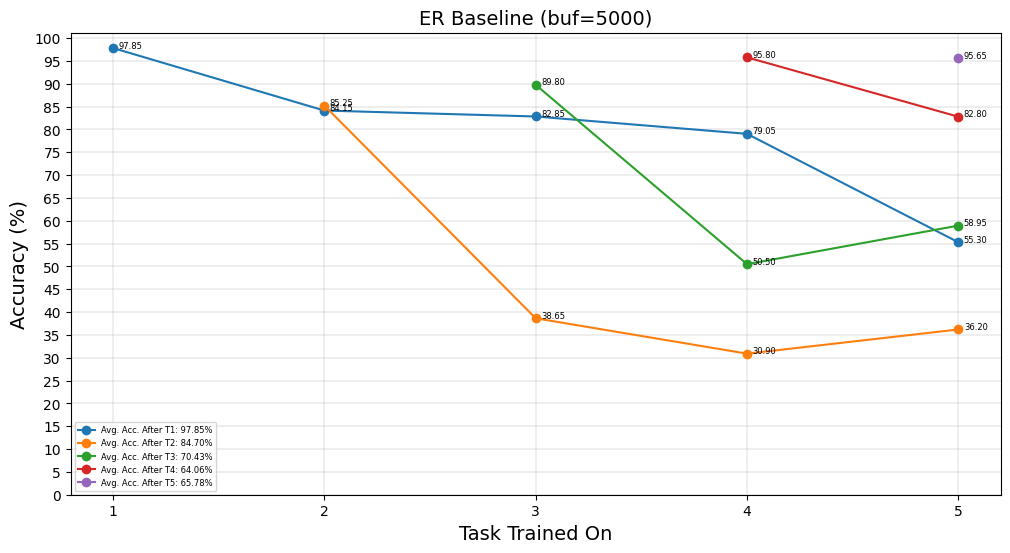

In [6]:
er_no_drift_avgs = cumulative_average_multiple_runs(
    "./logs/01-23-25-08-51-55-seq-cifar10-er-buf-5000-drift-6-n-2-adaptation-0.json"
)
print(f"FAA: {er_no_drift_avgs[-1]}")

er_without_drift = read_results(
    "./logs/01-23-25-08-51-55-seq-cifar10-er-buf-5000-drift-6-n-2-adaptation-0.json"
)
# 65.74, 65.78, 67.32
plot_results(
    er_without_drift,
    title="ER Baseline (buf=5000)",
)

## Defocus Blur Drift

### Severity 1

3 files found
1: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-02-03-40-seq-cifar10-er-buf-5000-drift-0-s-1-n-2-adaptation-0.json
2: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-02-39-13-seq-cifar10-er-buf-5000-drift-0-s-1-n-2-adaptation-0.json
3: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-01-28-01-seq-cifar10-er-buf-5000-drift-0-s-1-n-2-adaptation-0.json
FAA: 66.62


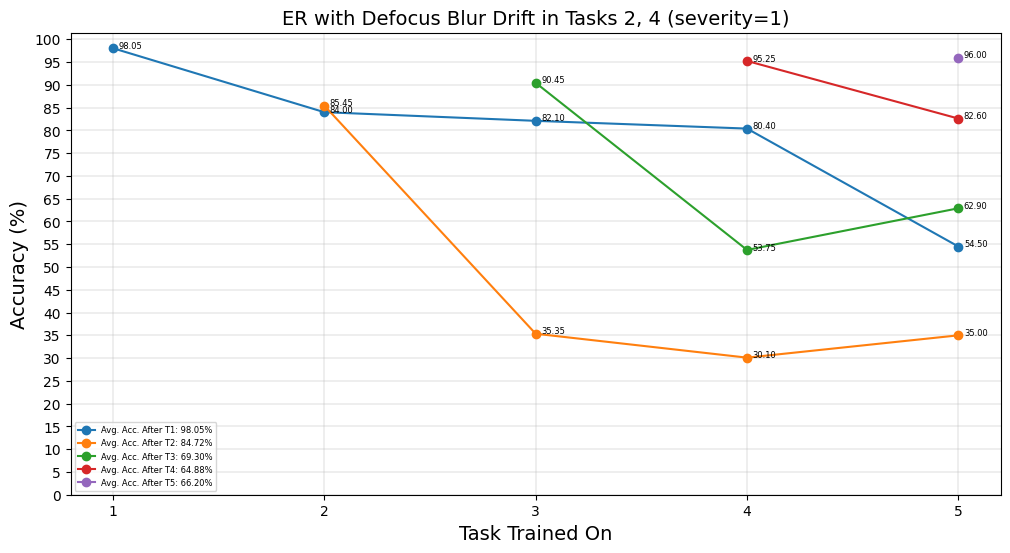

In [7]:
er_defocus_blur_s1_avgs = cumulative_average_multiple_runs(
    "../results/Concept-Drift/Drifts-vs-Severities/*-seq-cifar10-er-buf-5000-drift-0-s-1-n-2-adaptation-0.json"
)
print(f"FAA: {er_defocus_blur_s1_avgs[-1]}")

er_defocus_blur_s1 = read_results(
    "../results/Concept-Drift/Drifts-vs-Severities/02-03-25-02-03-40-seq-cifar10-er-buf-5000-drift-0-s-1-n-2-adaptation-0.json"
)  # 65.89, 66.20, 67.77

plot_results(
    er_defocus_blur_s1,
    title="ER with Defocus Blur Drift in Tasks 2, 4 (severity=1)",
)

### Severity 3

3 files found
1: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-04-25-31-seq-cifar10-er-buf-5000-drift-0-s-3-n-2-adaptation-0.json
2: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-03-50-01-seq-cifar10-er-buf-5000-drift-0-s-3-n-2-adaptation-0.json
3: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-03-14-36-seq-cifar10-er-buf-5000-drift-0-s-3-n-2-adaptation-0.json
FAA: 65.96666666666668


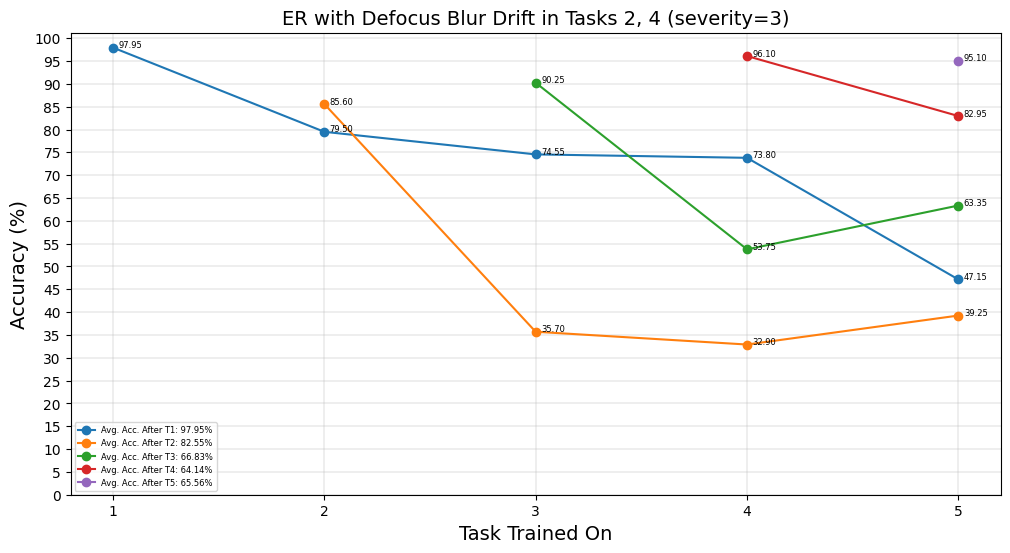

In [8]:
er_defocus_blur_s3_avgs = cumulative_average_multiple_runs(
    "../results/Concept-Drift/Drifts-vs-Severities/*-seq-cifar10-er-buf-5000-drift-0-s-3-n-2-adaptation-0.json"
)
print(f"FAA: {er_defocus_blur_s3_avgs[-1]}")

er_defocus_blur_s3 = read_results(
    "../results/Concept-Drift/Drifts-vs-Severities/02-03-25-03-14-36-seq-cifar10-er-buf-5000-drift-0-s-3-n-2-adaptation-0.json"
)  # 65.52, 65.56, 66.82

plot_results(
    er_defocus_blur_s3,
    title="ER with Defocus Blur Drift in Tasks 2, 4 (severity=3)",
)

### Severity 5

3 files found
1: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-05-00-50-seq-cifar10-er-buf-5000-drift-0-s-5-n-2-adaptation-0.json
2: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-06-11-55-seq-cifar10-er-buf-5000-drift-0-s-5-n-2-adaptation-0.json
3: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-05-36-30-seq-cifar10-er-buf-5000-drift-0-s-5-n-2-adaptation-0.json
FAA: 60.870000000000005


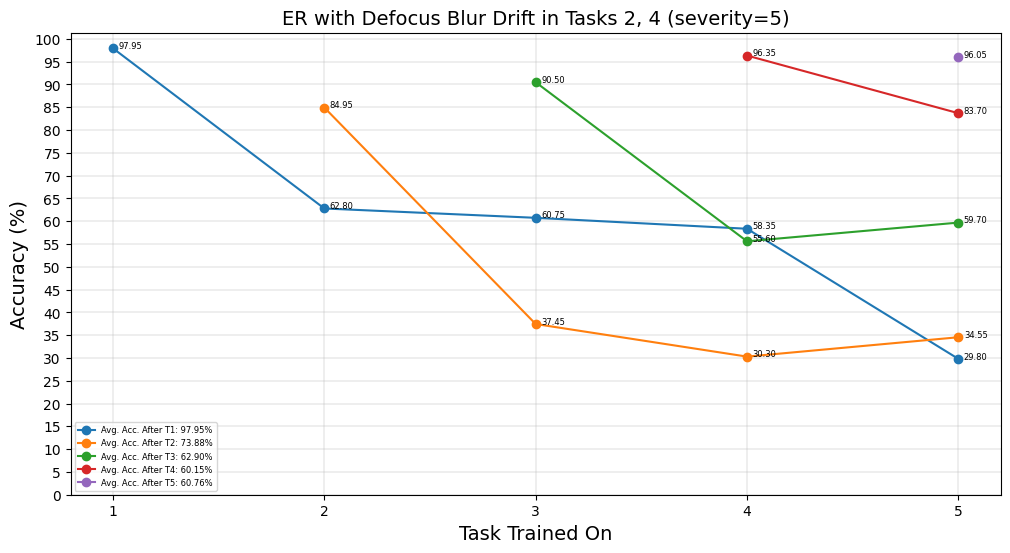

In [9]:
er_defocus_blur_s5_avgs = cumulative_average_multiple_runs(
    "../results/Concept-Drift/Drifts-vs-Severities/*-seq-cifar10-er-buf-5000-drift-0-s-5-n-2-adaptation-0.json"
)
print(f"FAA: {er_defocus_blur_s5_avgs[-1]}")

er_defocus_blur_s5 = read_results(
    "../results/Concept-Drift/Drifts-vs-Severities/02-03-25-05-00-50-seq-cifar10-er-buf-5000-drift-0-s-5-n-2-adaptation-0.json"
)  # 60.22, 60.76, 61.63

plot_results(
    er_defocus_blur_s5,
    title="ER with Defocus Blur Drift in Tasks 2, 4 (severity=5)",
)

### Cumulative Plots

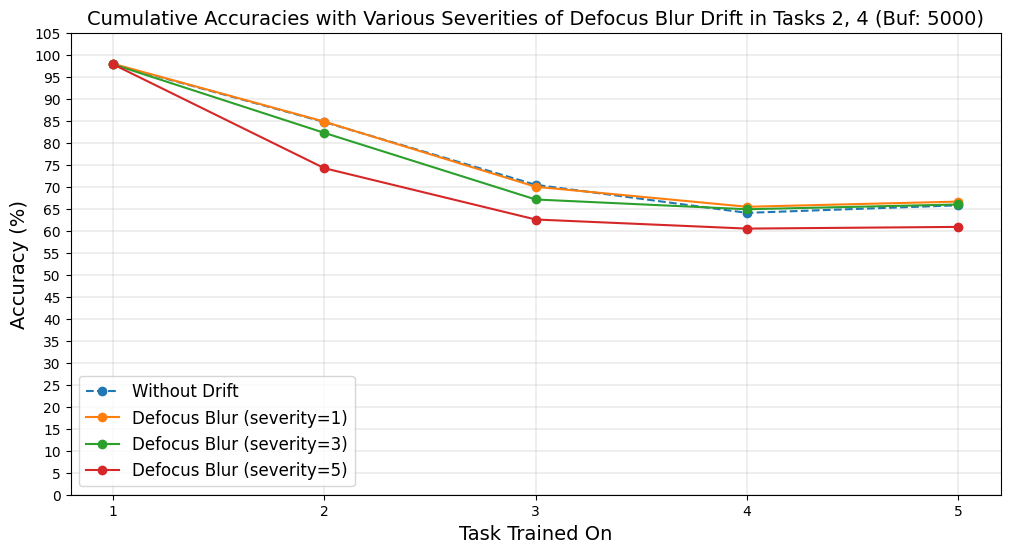

In [10]:
plot_cumulative_results(
    "Cumulative Accuracies with Various Severities of Defocus Blur Drift in Tasks 2, 4 (Buf: 5000)",
    [
        er_no_drift_avgs,
        er_defocus_blur_s1_avgs,
        er_defocus_blur_s3_avgs,
        er_defocus_blur_s5_avgs,
    ],
    [
        "Without Drift",
        "Defocus Blur (severity=1)",
        "Defocus Blur (severity=3)",
        "Defocus Blur (severity=5)",
    ],
)

## Gaussian Noise Drift

### Severity 1

3 files found
1: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-02-42-05-seq-cifar10-er-buf-5000-drift-1-s-1-n-2-adaptation-0.json
2: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-01-30-42-seq-cifar10-er-buf-5000-drift-1-s-1-n-2-adaptation-0.json
3: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-02-06-25-seq-cifar10-er-buf-5000-drift-1-s-1-n-2-adaptation-0.json
FAA: 50.836666666666666


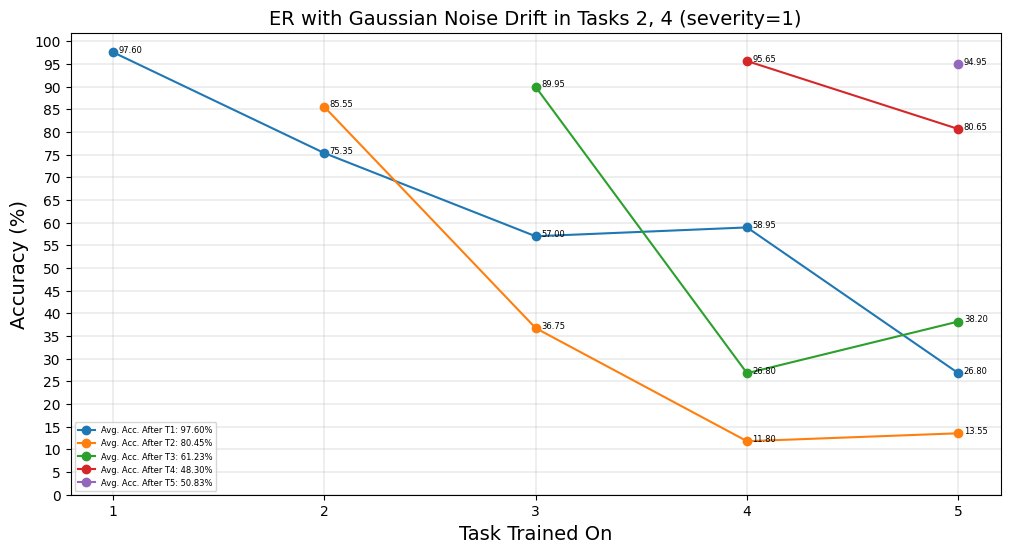

In [11]:
er_gaussian_noise_s1_avgs = cumulative_average_multiple_runs(
    "../results/Concept-Drift/Drifts-vs-Severities/*-seq-cifar10-er-buf-5000-drift-1-s-1-n-2-adaptation-0.json"
)
print(f"FAA: {er_gaussian_noise_s1_avgs[-1]}")

er_gaussian_noise_s1 = read_results(
    "../results/Concept-Drift/Drifts-vs-Severities/02-03-25-02-42-05-seq-cifar10-er-buf-5000-drift-1-s-1-n-2-adaptation-0.json"
)  # 50.63, 50.83, 51.05

plot_results(
    er_gaussian_noise_s1,
    title="ER with Gaussian Noise Drift in Tasks 2, 4 (severity=1)",
)

### Severity 3

3 files found
1: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-03-53-38-seq-cifar10-er-buf-5000-drift-1-s-3-n-2-adaptation-0.json
2: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-03-17-56-seq-cifar10-er-buf-5000-drift-1-s-3-n-2-adaptation-0.json
3: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-04-29-34-seq-cifar10-er-buf-5000-drift-1-s-3-n-2-adaptation-0.json
FAA: 38.07666666666667


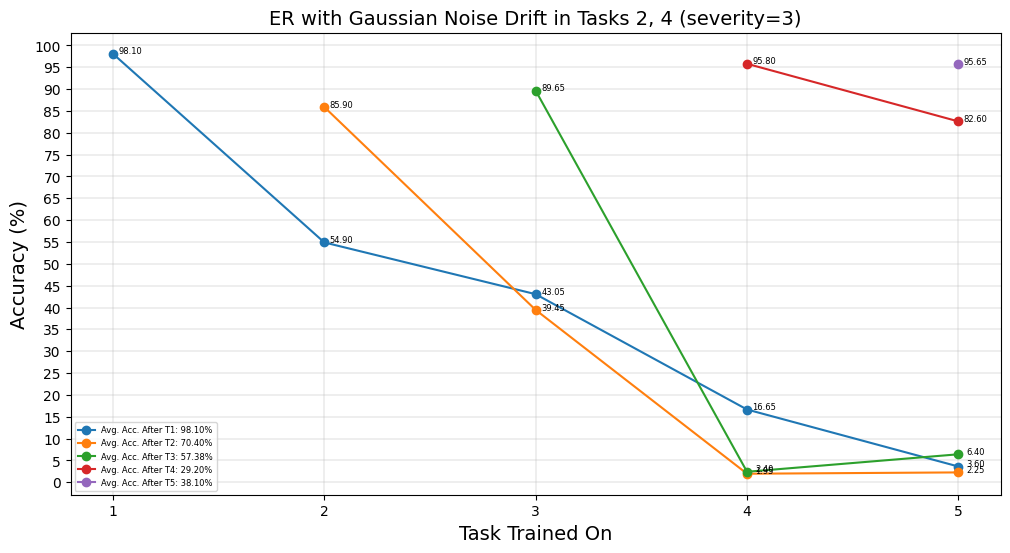

In [12]:
er_gaussian_noise_s3_avgs = cumulative_average_multiple_runs(
    "../results/Concept-Drift/Drifts-vs-Severities/*-seq-cifar10-er-buf-5000-drift-1-s-3-n-2-adaptation-0.json"
)
print(f"FAA: {er_gaussian_noise_s3_avgs[-1]}")

er_gaussian_noise_s3 = read_results(
    "../results/Concept-Drift/Drifts-vs-Severities/02-03-25-03-17-56-seq-cifar10-er-buf-5000-drift-1-s-3-n-2-adaptation-0.json"
)  # 37.93, 38.10, 38.20

plot_results(
    er_gaussian_noise_s3,
    title="ER with Gaussian Noise Drift in Tasks 2, 4 (severity=3)",
)

### Severity 5

3 files found
1: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-05-05-21-seq-cifar10-er-buf-5000-drift-1-s-5-n-2-adaptation-0.json
2: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-06-16-38-seq-cifar10-er-buf-5000-drift-1-s-5-n-2-adaptation-0.json
3: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-05-40-57-seq-cifar10-er-buf-5000-drift-1-s-5-n-2-adaptation-0.json
FAA: 35.75


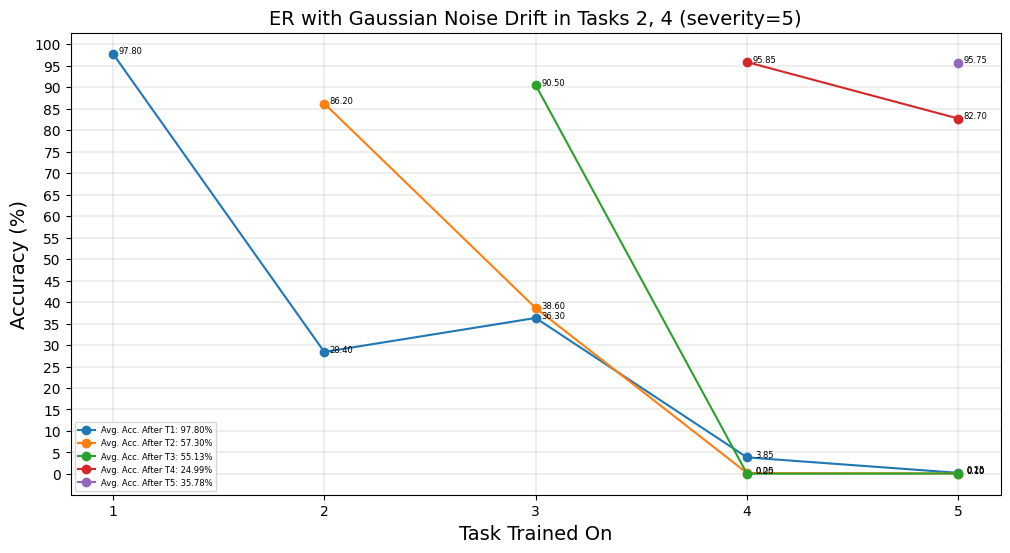

In [13]:
er_gaussian_noise_s5_avgs = cumulative_average_multiple_runs(
    "../results/Concept-Drift/Drifts-vs-Severities/*-seq-cifar10-er-buf-5000-drift-1-s-5-n-2-adaptation-0.json"
)
print(f"FAA: {er_gaussian_noise_s5_avgs[-1]}")

er_gaussian_noise_s5 = read_results(
    "../results/Concept-Drift/Drifts-vs-Severities/02-03-25-06-16-38-seq-cifar10-er-buf-5000-drift-1-s-5-n-2-adaptation-0.json"
)  # 35.66, 35.78, 35.81

plot_results(
    er_gaussian_noise_s5,
    title="ER with Gaussian Noise Drift in Tasks 2, 4 (severity=5)",
)

### Cumulative Plots

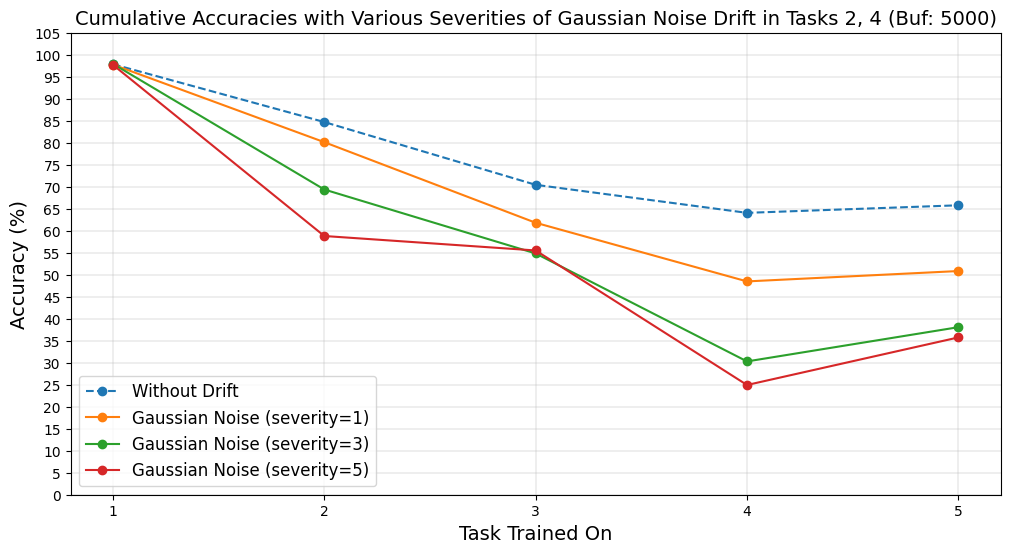

In [14]:
plot_cumulative_results(
    "Cumulative Accuracies with Various Severities of Gaussian Noise Drift in Tasks 2, 4 (Buf: 5000)",
    [
        er_no_drift_avgs,
        er_gaussian_noise_s1_avgs,
        er_gaussian_noise_s3_avgs,
        er_gaussian_noise_s5_avgs,
    ],
    [
        "Without Drift",
        "Gaussian Noise (severity=1)",
        "Gaussian Noise (severity=3)",
        "Gaussian Noise (severity=5)",
    ],
)

## Shot Noise Drift

### Severity 1

3 files found
1: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-02-07-31-seq-cifar10-er-buf-5000-drift-2-s-1-n-2-adaptation-0.json
2: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-02-42-58-seq-cifar10-er-buf-5000-drift-2-s-1-n-2-adaptation-0.json
3: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-01-31-58-seq-cifar10-er-buf-5000-drift-2-s-1-n-2-adaptation-0.json
FAA: 63.10333333333333


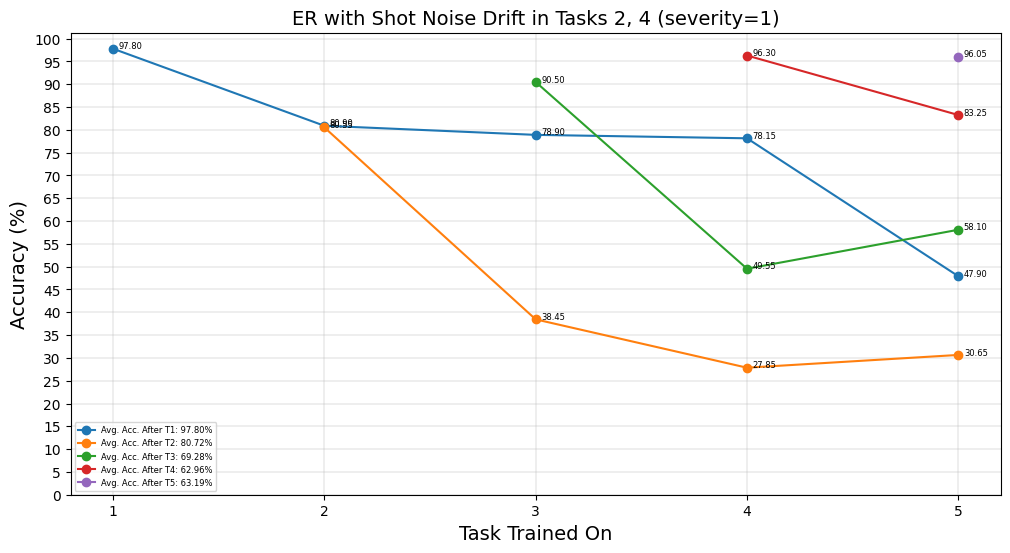

In [15]:
er_shot_noise_s1_avgs = cumulative_average_multiple_runs(
    "../results/Concept-Drift/Drifts-vs-Severities/*-seq-cifar10-er-buf-5000-drift-2-s-1-n-2-adaptation-0.json"
)
print(f"FAA: {er_shot_noise_s1_avgs[-1]}")

er_shot_noise_s1 = read_results(
    "../results/Concept-Drift/Drifts-vs-Severities/02-03-25-01-31-58-seq-cifar10-er-buf-5000-drift-2-s-1-n-2-adaptation-0.json"
)  # 62.62, 63.19, 63.50

plot_results(
    er_shot_noise_s1,
    title="ER with Shot Noise Drift in Tasks 2, 4 (severity=1)",
)

### Severity 3

3 files found
1: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-03-53-36-seq-cifar10-er-buf-5000-drift-2-s-3-n-2-adaptation-0.json
2: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-04-28-44-seq-cifar10-er-buf-5000-drift-2-s-3-n-2-adaptation-0.json
3: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-03-18-21-seq-cifar10-er-buf-5000-drift-2-s-3-n-2-adaptation-0.json
FAA: 55.48


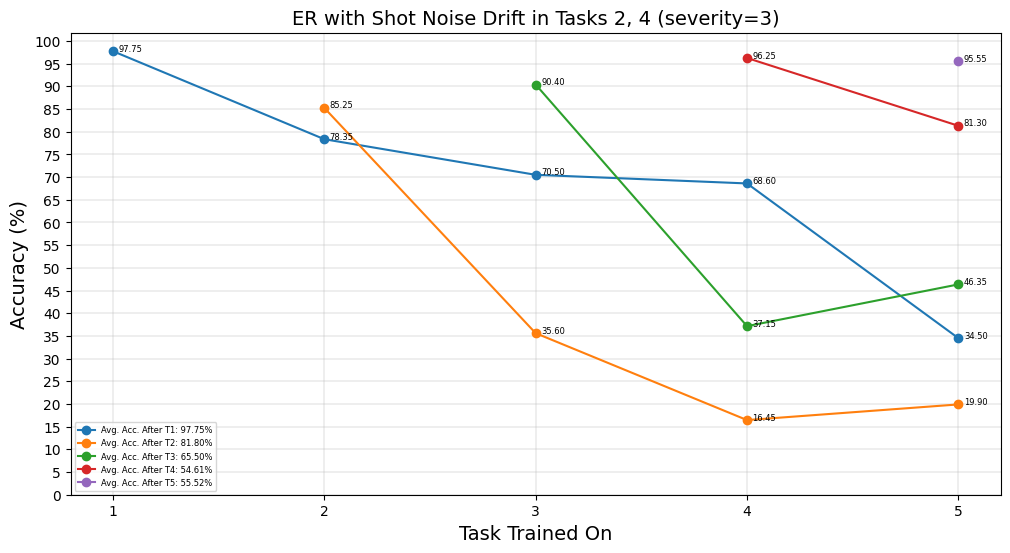

In [16]:
er_shot_noise_s3_avgs = cumulative_average_multiple_runs(
    "../results/Concept-Drift/Drifts-vs-Severities/*-seq-cifar10-er-buf-5000-drift-2-s-3-n-2-adaptation-0.json"
)
print(f"FAA: {er_shot_noise_s3_avgs[-1]}")

er_shot_noise_s3 = read_results(
    "../results/Concept-Drift/Drifts-vs-Severities/02-03-25-04-28-44-seq-cifar10-er-buf-5000-drift-2-s-3-n-2-adaptation-0.json"
)  # 55.14, 55.52, 55.78

plot_results(
    er_shot_noise_s3,
    title="ER with Shot Noise Drift in Tasks 2, 4 (severity=3)",
)

### Severity 5

3 files found
1: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-06-14-38-seq-cifar10-er-buf-5000-drift-2-s-5-n-2-adaptation-0.json
2: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-05-04-00-seq-cifar10-er-buf-5000-drift-2-s-5-n-2-adaptation-0.json
3: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-05-39-11-seq-cifar10-er-buf-5000-drift-2-s-5-n-2-adaptation-0.json
FAA: 48.6


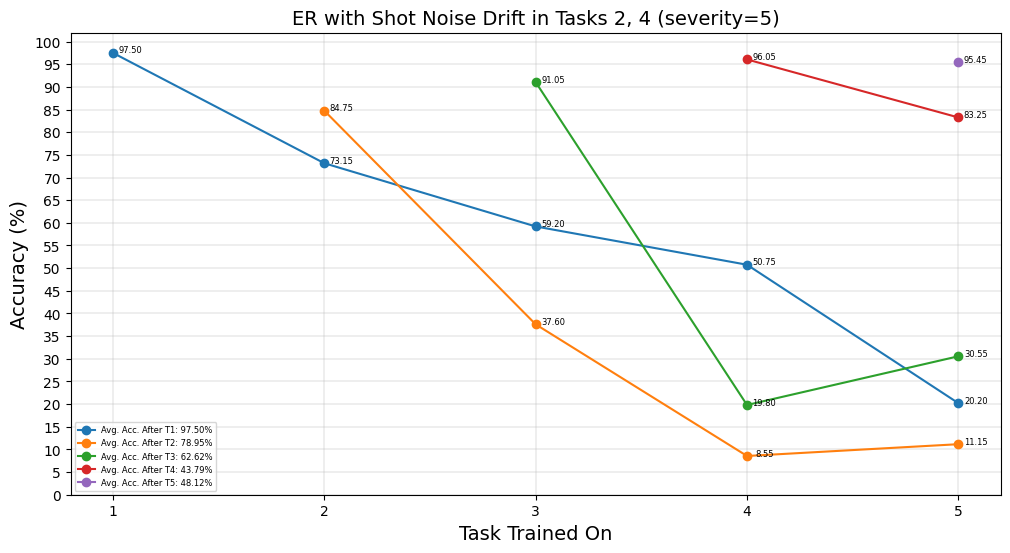

In [17]:
er_shot_noise_s5_avgs = cumulative_average_multiple_runs(
    "../results/Concept-Drift/Drifts-vs-Severities/*-seq-cifar10-er-buf-5000-drift-2-s-5-n-2-adaptation-0.json"
)
print(f"FAA: {er_shot_noise_s5_avgs[-1]}")

er_shot_noise_s5 = read_results(
    "../results/Concept-Drift/Drifts-vs-Severities/02-03-25-05-04-00-seq-cifar10-er-buf-5000-drift-2-s-5-n-2-adaptation-0.json"
)  # 47.53, 48.12, 50.15

plot_results(
    er_shot_noise_s5,
    title="ER with Shot Noise Drift in Tasks 2, 4 (severity=5)",
)

### Cumulative Plots

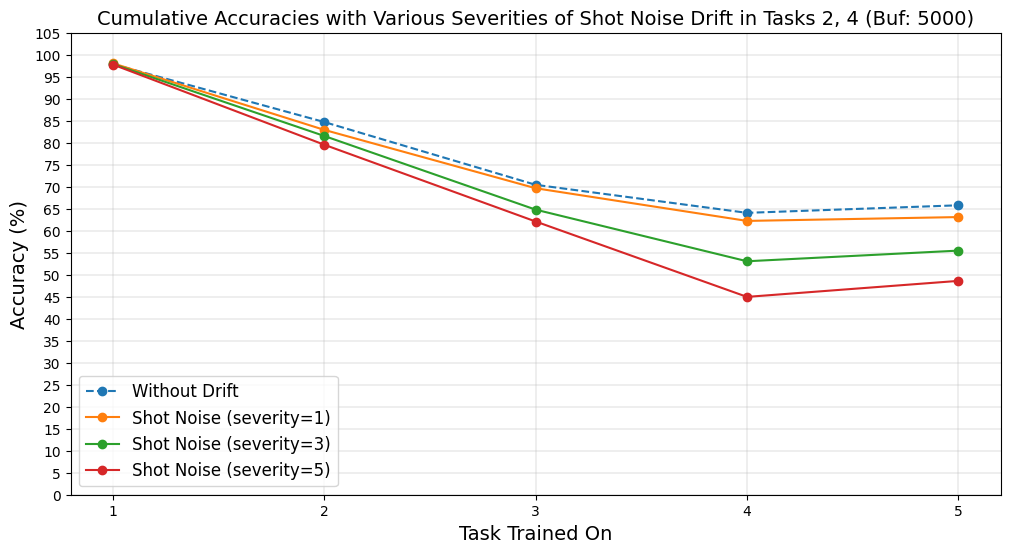

In [18]:
plot_cumulative_results(
    "Cumulative Accuracies with Various Severities of Shot Noise Drift in Tasks 2, 4 (Buf: 5000)",
    [
        er_no_drift_avgs,
        er_shot_noise_s1_avgs,
        er_shot_noise_s3_avgs,
        er_shot_noise_s5_avgs,
    ],
    [
        "Without Drift",
        "Shot Noise (severity=1)",
        "Shot Noise (severity=3)",
        "Shot Noise (severity=5)",
    ],
)

## Rotation Drift

### Severity 1

3 files found
1: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-01-35-08-seq-cifar10-er-buf-5000-drift-4-s-1-n-2-adaptation-0.json
2: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-02-46-08-seq-cifar10-er-buf-5000-drift-4-s-1-n-2-adaptation-0.json
3: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-02-10-37-seq-cifar10-er-buf-5000-drift-4-s-1-n-2-adaptation-0.json
FAA: 49.29999999999999


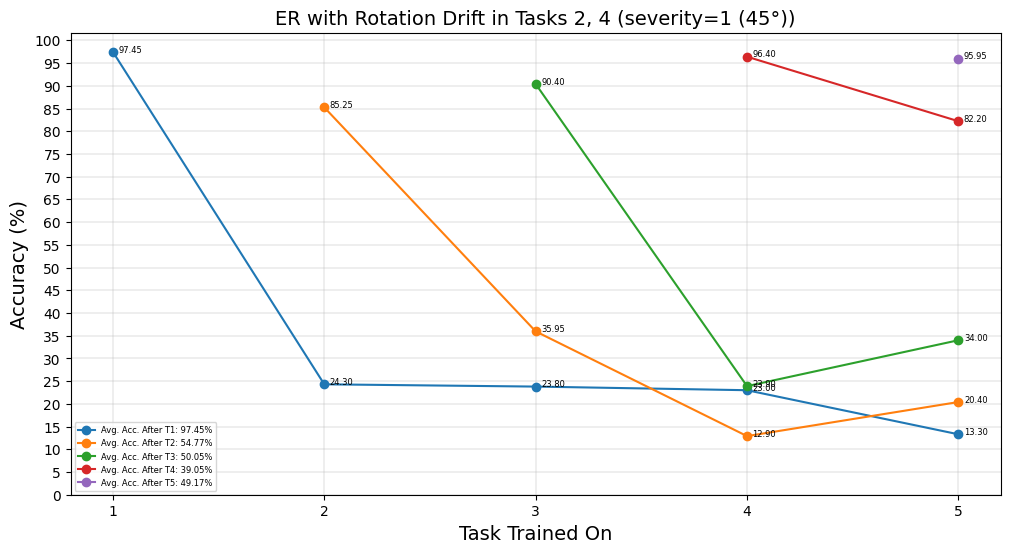

In [19]:
er_rotation_s1_avgs = cumulative_average_multiple_runs(
    "../results/Concept-Drift/Drifts-vs-Severities/*-seq-cifar10-er-buf-5000-drift-4-s-1-n-2-adaptation-0.json"
)
print(f"FAA: {er_rotation_s1_avgs[-1]}")

er_rotation_s1 = read_results(
    "../results/Concept-Drift/Drifts-vs-Severities/02-03-25-02-46-08-seq-cifar10-er-buf-5000-drift-4-s-1-n-2-adaptation-0.json"
)  # 48.88, 49.17, 49.85

plot_results(
    er_rotation_s1,
    title="ER with Rotation Drift in Tasks 2, 4 (severity=1 (45°))",
)

### Severity 3

3 files found
1: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-03-21-37-seq-cifar10-er-buf-5000-drift-4-s-3-n-2-adaptation-0.json
2: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-03-57-03-seq-cifar10-er-buf-5000-drift-4-s-3-n-2-adaptation-0.json
3: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-04-32-31-seq-cifar10-er-buf-5000-drift-4-s-3-n-2-adaptation-0.json
FAA: 45.083333333333336


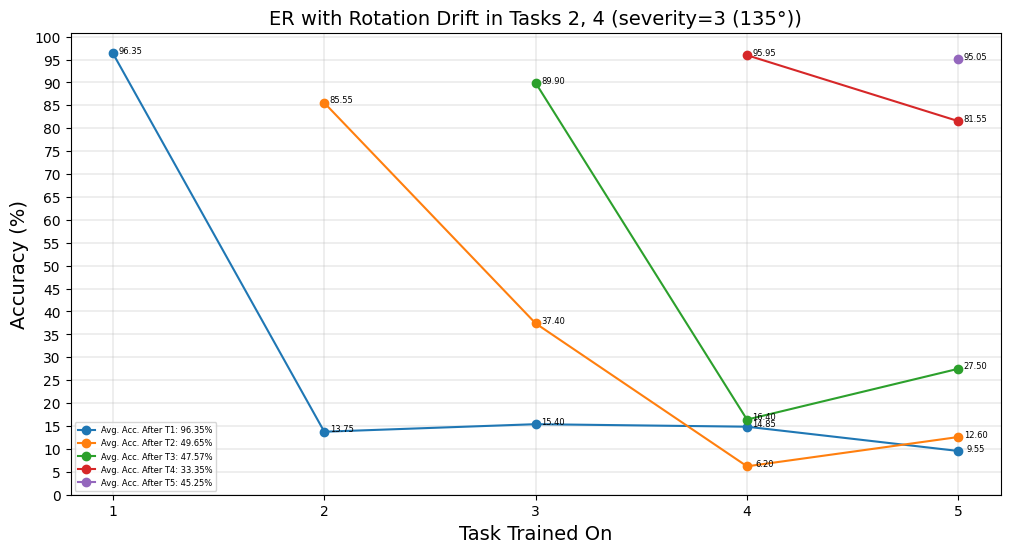

In [20]:
er_rotation_s3_avgs = cumulative_average_multiple_runs(
    "../results/Concept-Drift/Drifts-vs-Severities/*-seq-cifar10-er-buf-5000-drift-4-s-3-n-2-adaptation-0.json"
)
print(f"FAA: {er_rotation_s3_avgs[-1]}")

er_rotation_s3 = read_results(
    "../results/Concept-Drift/Drifts-vs-Severities/02-03-25-04-32-31-seq-cifar10-er-buf-5000-drift-4-s-3-n-2-adaptation-0.json"
)  # 44.74, 45.25, 45.26

plot_results(
    er_rotation_s3,
    title="ER with Rotation Drift in Tasks 2, 4 (severity=3 (135°))",
)

### Severity 5

3 files found
1: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-06-19-38-seq-cifar10-er-buf-5000-drift-4-s-5-n-2-adaptation-0.json
2: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-05-43-47-seq-cifar10-er-buf-5000-drift-4-s-5-n-2-adaptation-0.json
3: ../results/Concept-Drift/Drifts-vs-Severities/02-03-25-05-08-02-seq-cifar10-er-buf-5000-drift-4-s-5-n-2-adaptation-0.json
FAA: 45.5


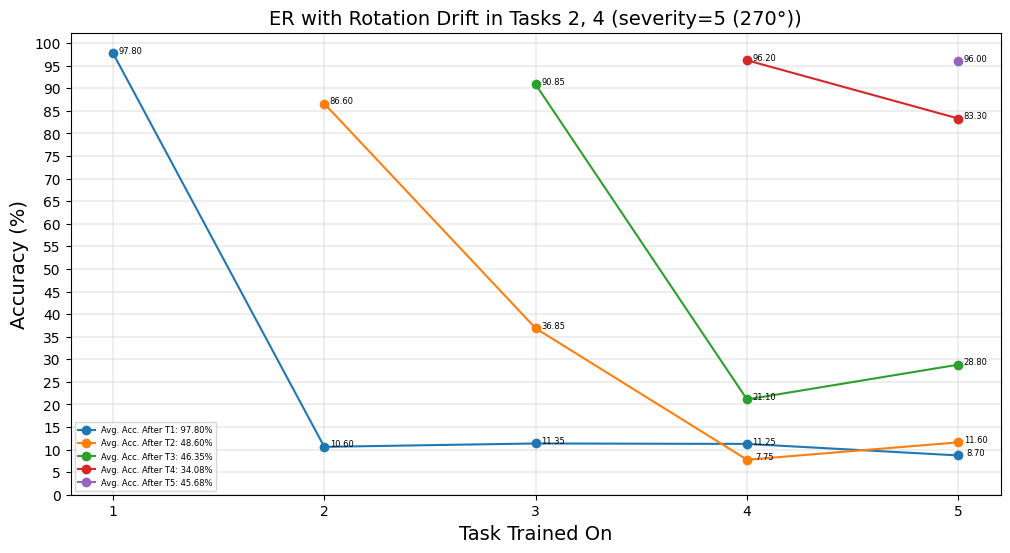

In [21]:
er_rotation_s5_avgs = cumulative_average_multiple_runs(
    "../results/Concept-Drift/Drifts-vs-Severities/*-seq-cifar10-er-buf-5000-drift-4-s-5-n-2-adaptation-0.json"
)
print(f"FAA: {er_rotation_s5_avgs[-1]}")

er_rotation_s5 = read_results(
    "../results/Concept-Drift/Drifts-vs-Severities/02-03-25-05-43-47-seq-cifar10-er-buf-5000-drift-4-s-5-n-2-adaptation-0.json"
)  # 44.94, 45.68, 45.88

plot_results(
    er_rotation_s5,
    title="ER with Rotation Drift in Tasks 2, 4 (severity=5 (270°))",
)

### Cumulative Plots

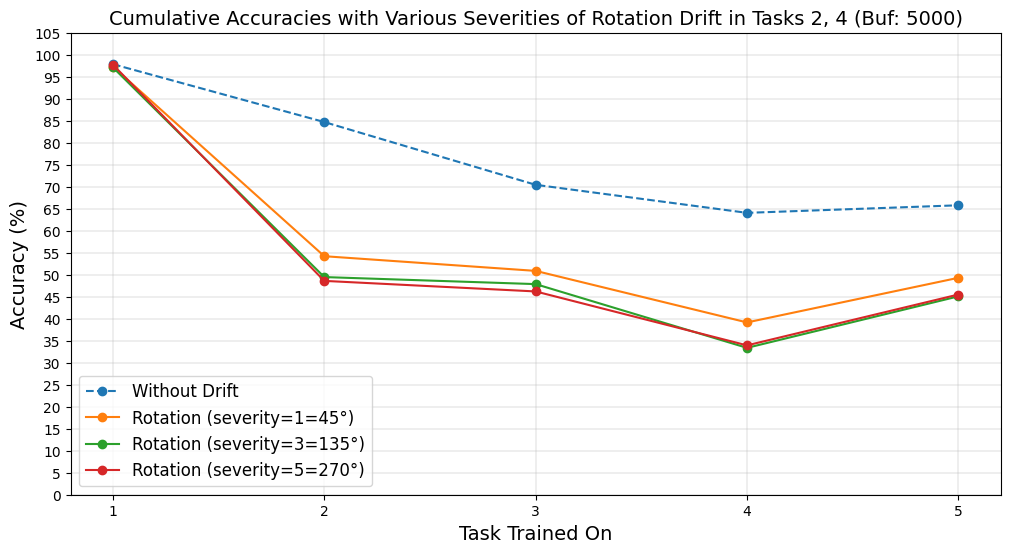

In [22]:
plot_cumulative_results(
    "Cumulative Accuracies with Various Severities of Rotation Drift in Tasks 2, 4 (Buf: 5000)",
    [
        er_no_drift_avgs,
        er_rotation_s1_avgs,
        er_rotation_s3_avgs,
        er_rotation_s5_avgs,
    ],
    [
        "Without Drift",
        "Rotation (severity=1=45°)",
        "Rotation (severity=3=135°)",
        "Rotation (severity=5=270°)",
    ],
)

## Permutation Drift

### Severity 1

3 files found
1: ../results/Concept-Drift/Drifts-vs-Severities/02-04-25-12-02-45-seq-cifar10-er-buf-5000-drift-5-s-1-n-2-adaptation-0.json
2: ../results/Concept-Drift/Drifts-vs-Severities/02-04-25-12-51-55-seq-cifar10-er-buf-5000-drift-5-s-1-n-2-adaptation-0.json
3: ../results/Concept-Drift/Drifts-vs-Severities/02-04-25-12-27-07-seq-cifar10-er-buf-5000-drift-5-s-1-n-2-adaptation-0.json
FAA: 45.89000000000001


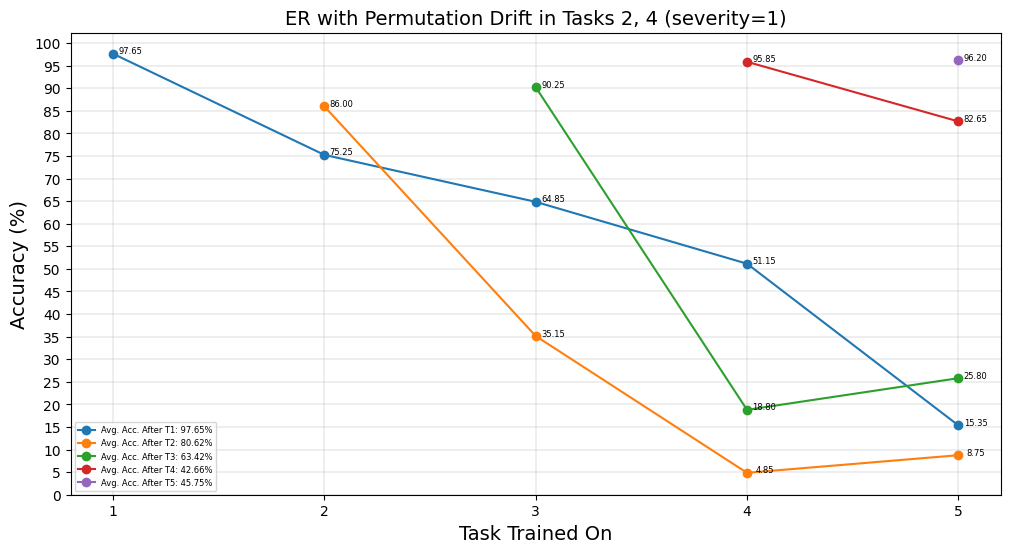

In [23]:
er_permutation_s1_avgs = cumulative_average_multiple_runs(
    "../results/Concept-Drift/Drifts-vs-Severities/*-seq-cifar10-er-buf-5000-drift-5-s-1-n-2-adaptation-0.json"
)
print(f"FAA: {er_permutation_s1_avgs[-1]}")

er_permutation_s1 = read_results(
    "../results/Concept-Drift/Drifts-vs-Severities/02-04-25-12-27-07-seq-cifar10-er-buf-5000-drift-5-s-1-n-2-adaptation-0.json"
)  # 45.36, 45.75, 46.56

plot_results(
    er_permutation_s1,
    title="ER with Permutation Drift in Tasks 2, 4 (severity=1)",
)

### Severity 3

3 files found
1: ../results/Concept-Drift/Drifts-vs-Severities/02-04-25-13-16-04-seq-cifar10-er-buf-5000-drift-5-s-3-n-2-adaptation-0.json
2: ../results/Concept-Drift/Drifts-vs-Severities/02-04-25-14-05-47-seq-cifar10-er-buf-5000-drift-5-s-3-n-2-adaptation-0.json
3: ../results/Concept-Drift/Drifts-vs-Severities/02-04-25-13-41-38-seq-cifar10-er-buf-5000-drift-5-s-3-n-2-adaptation-0.json
FAA: 36.38666666666666


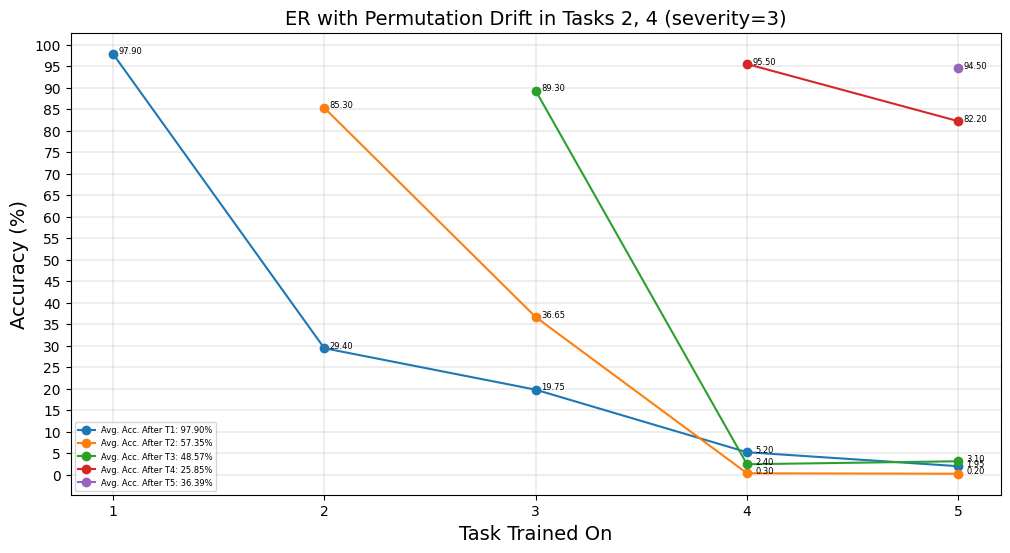

In [24]:
er_permutation_s3_avgs = cumulative_average_multiple_runs(
    "../results/Concept-Drift/Drifts-vs-Severities/*-seq-cifar10-er-buf-5000-drift-5-s-3-n-2-adaptation-0.json"
)
print(f"FAA: {er_permutation_s3_avgs[-1]}")

er_permutation_s3 = read_results(
    "../results/Concept-Drift/Drifts-vs-Severities/02-04-25-14-05-47-seq-cifar10-er-buf-5000-drift-5-s-3-n-2-adaptation-0.json"
)  # 36.02, 36.39, 36.75

plot_results(
    er_permutation_s3,
    title="ER with Permutation Drift in Tasks 2, 4 (severity=3)",
)

### Severity 5

3 files found
1: ../results/Concept-Drift/Drifts-vs-Severities/02-04-25-15-27-36-seq-cifar10-er-buf-5000-drift-5-s-5-n-2-adaptation-0.json
2: ../results/Concept-Drift/Drifts-vs-Severities/02-04-25-14-31-09-seq-cifar10-er-buf-5000-drift-5-s-5-n-2-adaptation-0.json
3: ../results/Concept-Drift/Drifts-vs-Severities/02-04-25-15-00-06-seq-cifar10-er-buf-5000-drift-5-s-5-n-2-adaptation-0.json
FAA: 36.013333333333335


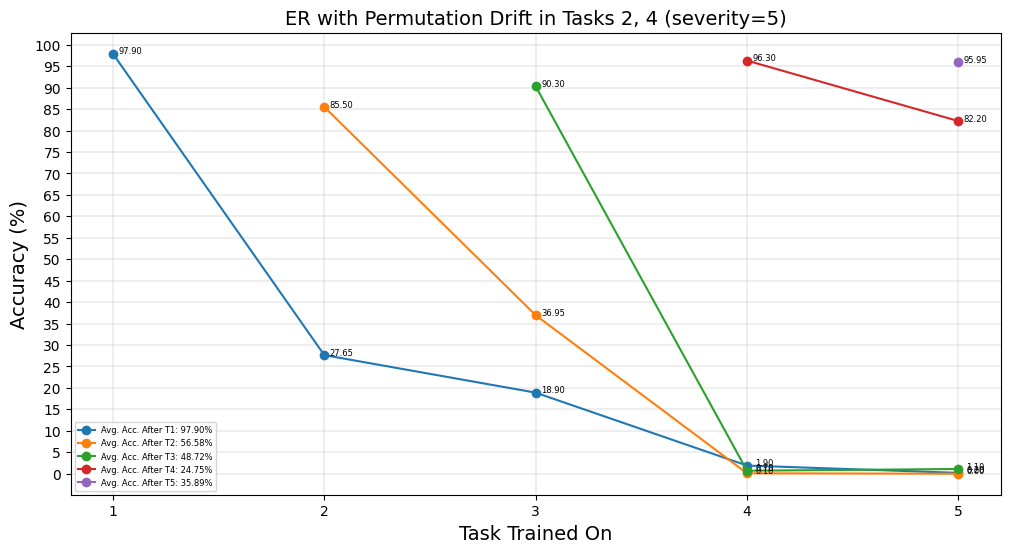

In [25]:
er_permutation_s5_avgs = cumulative_average_multiple_runs(
    "../results/Concept-Drift/Drifts-vs-Severities/*-seq-cifar10-er-buf-5000-drift-5-s-5-n-2-adaptation-0.json"
)
print(f"FAA: {er_permutation_s5_avgs[-1]}")

er_permutation_s5 = read_results(
    "../results/Concept-Drift/Drifts-vs-Severities/02-04-25-15-27-36-seq-cifar10-er-buf-5000-drift-5-s-5-n-2-adaptation-0.json"
)  # 35.85, 35.89, 36.30

plot_results(
    er_permutation_s5,
    title="ER with Permutation Drift in Tasks 2, 4 (severity=5)",
)

### Cumulative Plots

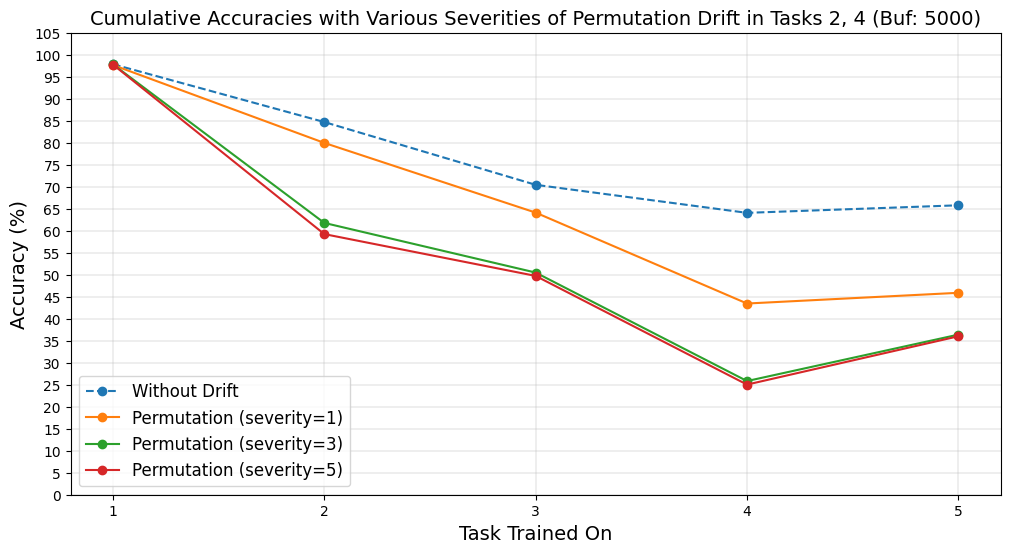

In [26]:
plot_cumulative_results(
    "Cumulative Accuracies with Various Severities of Permutation Drift in Tasks 2, 4 (Buf: 5000)",
    [
        er_no_drift_avgs,
        er_permutation_s1_avgs,
        er_permutation_s3_avgs,
        er_permutation_s5_avgs,
    ],
    [
        "Without Drift",
        "Permutation (severity=1)",
        "Permutation (severity=3)",
        "Permutation (severity=5)",
    ],
)

# Comparisons

## Buffer 5000

### Severity with Various Drifts

In [33]:
def plot_cumulative_subplots(cumulative_averages, subtitles, plot_filename=""):
    assert len(cumulative_averages) // 6 == len(
        subtitles
    ), "The number of methods and plot subtitles must match."

    labels = ["no drift", "defocus blur", "gaussian noise", "shot noise", "rotation", "permutation"]

    fig, axes = plt.subplots(1, len(cumulative_averages) // 6, figsize=(12, 5))

    for i in range(len(cumulative_averages) // 6):
        for j in range(6):
            axes[i].plot(
                range(1, len(cumulative_averages[6 * i + j]) + 1),
                cumulative_averages[6 * i + j],
                "--o" if j == 0 else "-o",
                label=f"{labels[j]}: {cumulative_averages[6 * i + j][-1]:.2f}%",
            )
            axes[i].grid(True, linewidth=0.3)
            axes[i].set_title(subtitles[i], fontsize=14)
            axes[i].legend(prop={"size": 8}, loc="lower left")
            axes[i].set_xticks(range(1, len(cumulative_averages[i]) + 1))
            axes[i].set_yticks(list(range(0, 101, 5)))

    fig.supxlabel("Task Trained On", fontsize=14)
    fig.supylabel("Accuracy (%)", fontsize=14)
    plt.tight_layout()
    if plot_filename != "" and len(plot_filename) > 0:
        plt.savefig(plot_filename, format="pdf", dpi=300)
    plt.show()

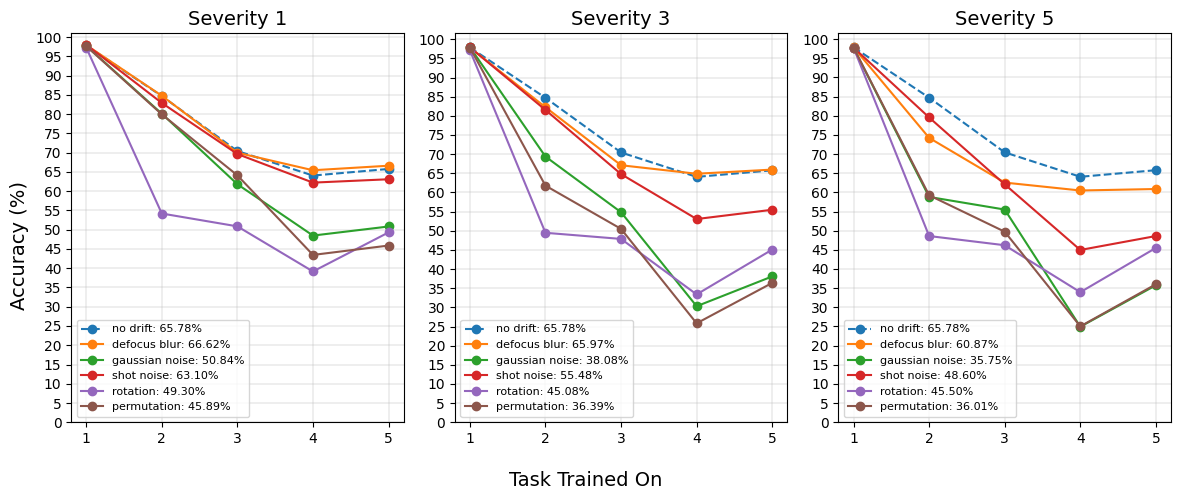

In [ ]:
plot_cumulative_subplots(
    [
        er_no_drift_avgs,
        er_defocus_blur_s1_avgs,
        er_gaussian_noise_s1_avgs,
        er_shot_noise_s1_avgs,
        er_rotation_s1_avgs,
        er_permutation_s1_avgs,
        er_no_drift_avgs,
        er_defocus_blur_s3_avgs,
        er_gaussian_noise_s3_avgs,
        er_shot_noise_s3_avgs,
        er_rotation_s3_avgs,
        er_permutation_s3_avgs,
        er_no_drift_avgs,
        er_defocus_blur_s5_avgs,
        er_gaussian_noise_s5_avgs,
        er_shot_noise_s5_avgs,
        er_rotation_s5_avgs,
        er_permutation_s5_avgs,
    ],
    [
        "Severity 1",
        "Severity 3",
        "Severity 5",
    ],
    # plot_filename="CIFAR10_Buff_5000_n_2_severity_vs_drifts.pdf"
)

### Different Drifts with Varying Severities

In [37]:
def plot_cumulative_subplots(cumulative_averages, subtitles, plot_filename=""):
    assert len(cumulative_averages) // 4 == len(
        subtitles
    ), "The number of methods and plot subtitles must match."

    labels = ["no drift", "severity=1", "severity=3", "severity=5"]

    fig, axes = plt.subplots(1, len(cumulative_averages) // 4, figsize=(20, 5))

    for i in range(len(cumulative_averages) // 4):
        for j in range(4):
            axes[i].plot(
                range(1, len(cumulative_averages[4 * i + j]) + 1),
                cumulative_averages[4 * i + j],
                "--o" if j == 0 else "-o",
                label=f"{labels[j]}: {cumulative_averages[4 * i + j][-1]:.2f}%",
            )
            axes[i].grid(True, linewidth=0.3)
            axes[i].set_title(subtitles[i], fontsize=16)
            axes[i].legend(prop={"size": 14}, loc="lower left")
            axes[i].set_xticks(range(1, len(cumulative_averages[i]) + 1))
            axes[i].set_yticks(list(range(0, 101, 10)))

    fig.supxlabel("Task Trained On", fontsize=16)
    fig.supylabel("Accuracy (%)\n", fontsize=16)
    plt.tight_layout()
    if plot_filename != "" and len(plot_filename) > 0:
        plt.savefig(plot_filename, format="pdf", dpi=300)
    plt.show()

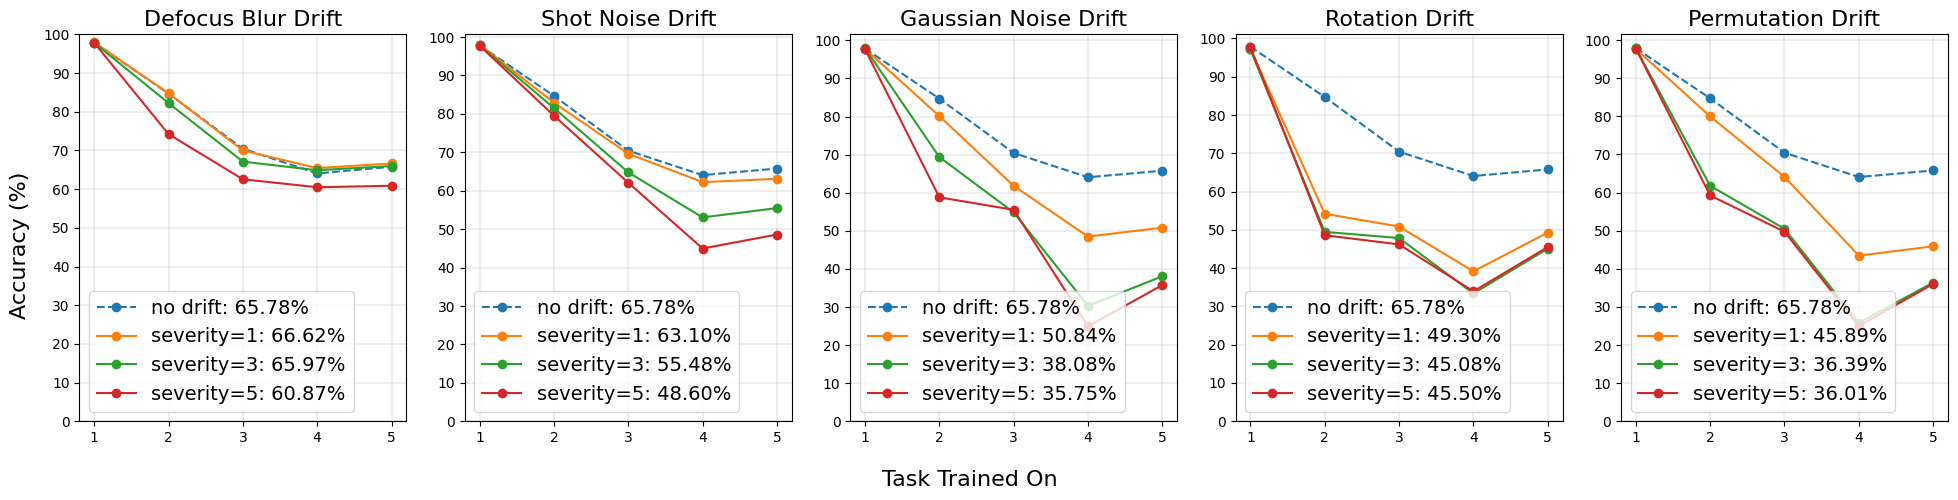

In [38]:
plot_cumulative_subplots(
    [
        er_no_drift_avgs,
        er_defocus_blur_s1_avgs,
        er_defocus_blur_s3_avgs,
        er_defocus_blur_s5_avgs,
        er_no_drift_avgs,
        er_shot_noise_s1_avgs,
        er_shot_noise_s3_avgs,
        er_shot_noise_s5_avgs,
        er_no_drift_avgs,
        er_gaussian_noise_s1_avgs,
        er_gaussian_noise_s3_avgs,
        er_gaussian_noise_s5_avgs,
        er_no_drift_avgs,
        er_rotation_s1_avgs,
        er_rotation_s3_avgs,
        er_rotation_s5_avgs,
        er_no_drift_avgs,
        er_permutation_s1_avgs,
        er_permutation_s3_avgs,
        er_permutation_s5_avgs,
    ],
    [
        "Defocus Blur Drift",
        "Shot Noise Drift",
        "Gaussian Noise Drift",
        "Rotation Drift",
        "Permutation Drift",
    ],
    plot_filename="CIFAR10_Buff_5000_n_2_drift_vs_severities.pdf"
)